----------------------
#### Train and Deploy CNN Models
---------------------

#### Download the data

In [1]:
# Download the dataset from https://www.kaggle.com/c/diabetic-retinopathy-detection/data

In [42]:
import numpy as np 
import pandas as pd 
import os
import random
import sys
import csv
import keras
import tensorflow as tf
import cv2
from subprocess import check_output
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras import backend as K

from sklearn.model_selection import train_test_split

In [43]:
NUM_CLASSES = 5
WIDTH = 128
HEIGHT = 128
DEPTH = 3

inputShape = (HEIGHT, WIDTH, DEPTH)
EPOCHS = 15
INIT_LR = 1e-3

BS = 8

In [51]:
location_train = r'E:\delete_junk\train\data'

In [52]:
images = os.listdir(location_train)

In [53]:
print("Number of files = " + str((len(images))))

Number of files = 1427


In [54]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [55]:
imageFullPath = os.path.join(os.path.sep, location_train, '876_left.jpeg')
imageFullPath

'E:\\delete_junk\\train\\data\\876_left.jpeg'

#### Read the training data

Image shape :  (2592, 3888, 3)


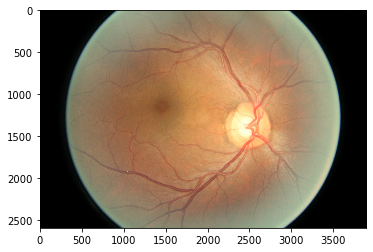

In [56]:
# location_train = r'C:\Users\Nageswaran B\Documents\machine_learning\machine_learning_project\simplilearn\cnn\dataset'

imageFullPath  = os.path.join(os.path.sep, location_train, '876_left.jpeg')
img = load_img(imageFullPath)
img = img_to_array(img)
img = img/255
print('Image shape : ', img.shape)

plt.imshow(img);

#### Define the variables

In [57]:
scale_percent = 10                 # percent of original size

width  = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

dim = (width, height)
dim

(388, 259)

#### read the meta data on images

A clinician has rated the presence of diabetic retinopathy in each image on a scale of 0 to 4, according to the following scale:

|level| description|
|-----| -----------|
|0 -  | No DR      |
|1 - |Mild|
|2 - |Moderate|
|3 - |Severe|
|4 - |Proliferative DR|

In [58]:
location_train_labels = r"E:\delete_junk\train\labels\trainLabels.csv"

In [59]:
levels_df = pd.read_csv(location_train_labels, sep=',')
levels_df.sample(6)

,image,level
1038,9573_left,0
1259,9809_right,2
691,9099_right,0
750,9173_left,2
692,9100_left,1
909,9383_right,0


In [60]:
# data distribution
levels_df.level.value_counts()

0    1016
2     230
1     113
4      36
3      32
Name: level, dtype: int64

In [61]:
# prepare train and test splits
train_df = levels_df.groupby("level")[["image", "level"]].sample(frac=0.7, random_state=2)
test_df  = levels_df.drop(list(train_df.index), axis=0)

In [62]:
print('Train.. data distribution :\n', train_df.level.value_counts())
print('Test .. data distribution :\n',  test_df.level.value_counts())

Train.. data distribution :
 0    711
2    161
1     79
4     25
3     22
Name: level, dtype: int64
Test .. data distribution :
 0    305
2     69
1     34
4     11
3     10
Name: level, dtype: int64


In [78]:
location_train_all = r'E:\delete_junk\train\data'
location_train_level     = r'E:\delete_junk\train\train-stratified'
location_test_level     = r'E:\delete_junk\train\test-stratified'

In [79]:
import shutil

In [80]:
for idx, row in train_df.iterrows():
    
    if row.level ==0:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_train_level = location_train + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_train_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==1:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_train_level = location_train + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_train_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==2:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_train_level = location_train + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_train_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==3:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_train_level = location_train + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_train_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==4:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_train_level = location_train + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_train_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)

In [82]:
for idx, row in train_df.iterrows():
    
    
    if row.level ==0:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from = '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_test_level = location_test + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_test_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==1:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_test_level = location_test + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_test_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==2:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_test_level = location_test + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_test_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==3:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_test_level = location_test + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_test_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)
        
    if row.level ==4:
        imageFullPath_from = os.path.join(os.path.sep, location_train_all, row.image)
        imageFullPath_from = imageFullPath_from + '.jpeg'
        
        if not os.path.isfile(imageFullPath_from):
            continue
            
        location_test_level = location_test + '\\' + str(row.level)
        imageFullPath_to = os.path.join(os.path.sep, location_test_level, row.image)
        imageFullPath_to = imageFullPath_to + '.jpeg'
        
        shutil.copy(imageFullPath_from, imageFullPath_to)

In [83]:
train_datagen = ImageDataGenerator(rescale           = 1./255, 
                                   zoom_range        = 0.3,             # set range for random zoom
                                   rotation_range    = 50,
                                   width_shift_range = 0.2, 
                                   height_shift_range= 0.2, 
                                   shear_range       = 0.2, 
                                   vertical_flip     = True,            # randomly flip images
                                   horizontal_flip   = True,            # randomly flip images
                                   fill_mode         = 'nearest'        # set mode for filling points outside the input boundaries
                                   )

val_datagen = ImageDataGenerator(rescale=1./255)

In [84]:
# dimensions of our images.
#img_width, img_height = 150, 150
img_width, img_height  = 259, 388

In [85]:
train_data_dir      = r'E:\delete_junk\train\train-stratified'
validation_data_dir = r'E:\delete_junk\train\test-stratified'

In [86]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [87]:
input_shape

(259, 388, 3)